# Little info about data

We asked AI to generate us some damaged data about Czech actors. So he/she/it did it and we tried to analyze them a bit. We tried to generate the data ourselves as well.

# Data Loading

In [99]:
!pip install datasets

In [100]:
from datasets import load_dataset
dataset = load_dataset("dankajakubkova/actors")


In [101]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(dataset['train'])

# Data Inspection

In [102]:
# Show basic information
df.info()

# Summary of variables
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1000 non-null   int64  
 1   Age                  950 non-null    float64
 2   Gender               920 non-null    object 
 3   Years of Experience  980 non-null    float64
 4   Number of Plays      920 non-null    float64
 5   Average Rating       850 non-null    float64
 6   Monthly Income       800 non-null    float64
 7   City of Residence    980 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 62.6+ KB


,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
count,1000.000000,950.000000,920,980.000000,920.000000,850.000000,8.000000e+02,980
unique,NaN,NaN,8,NaN,NaN,NaN,NaN,9
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Ostrava
freq,NaN,NaN,420,NaN,NaN,NaN,NaN,329
mean,500.500000,64.607368,NaN,81.919388,430.223913,4.358494,1.227799e+05,NaN
std,288.819436,107.206902,NaN,177.241606,1498.186556,3.175252,2.698625e+05,NaN
min,1.000000,-100.000000,NaN,0.000000,-492.000000,-1.970000,8.709000e+03,NaN
25%,250.750000,30.000000,NaN,11.000000,66.000000,1.772500,3.409100e+04,NaN
50%,500.500000,53.000000,NaN,25.000000,153.000000,4.365000,4.092550e+04,NaN
75%,750.250000,78.000000,NaN,51.000000,238.250000,7.015000,4.898925e+04,NaN


# Plotting the distribution of variables

**Histograms**

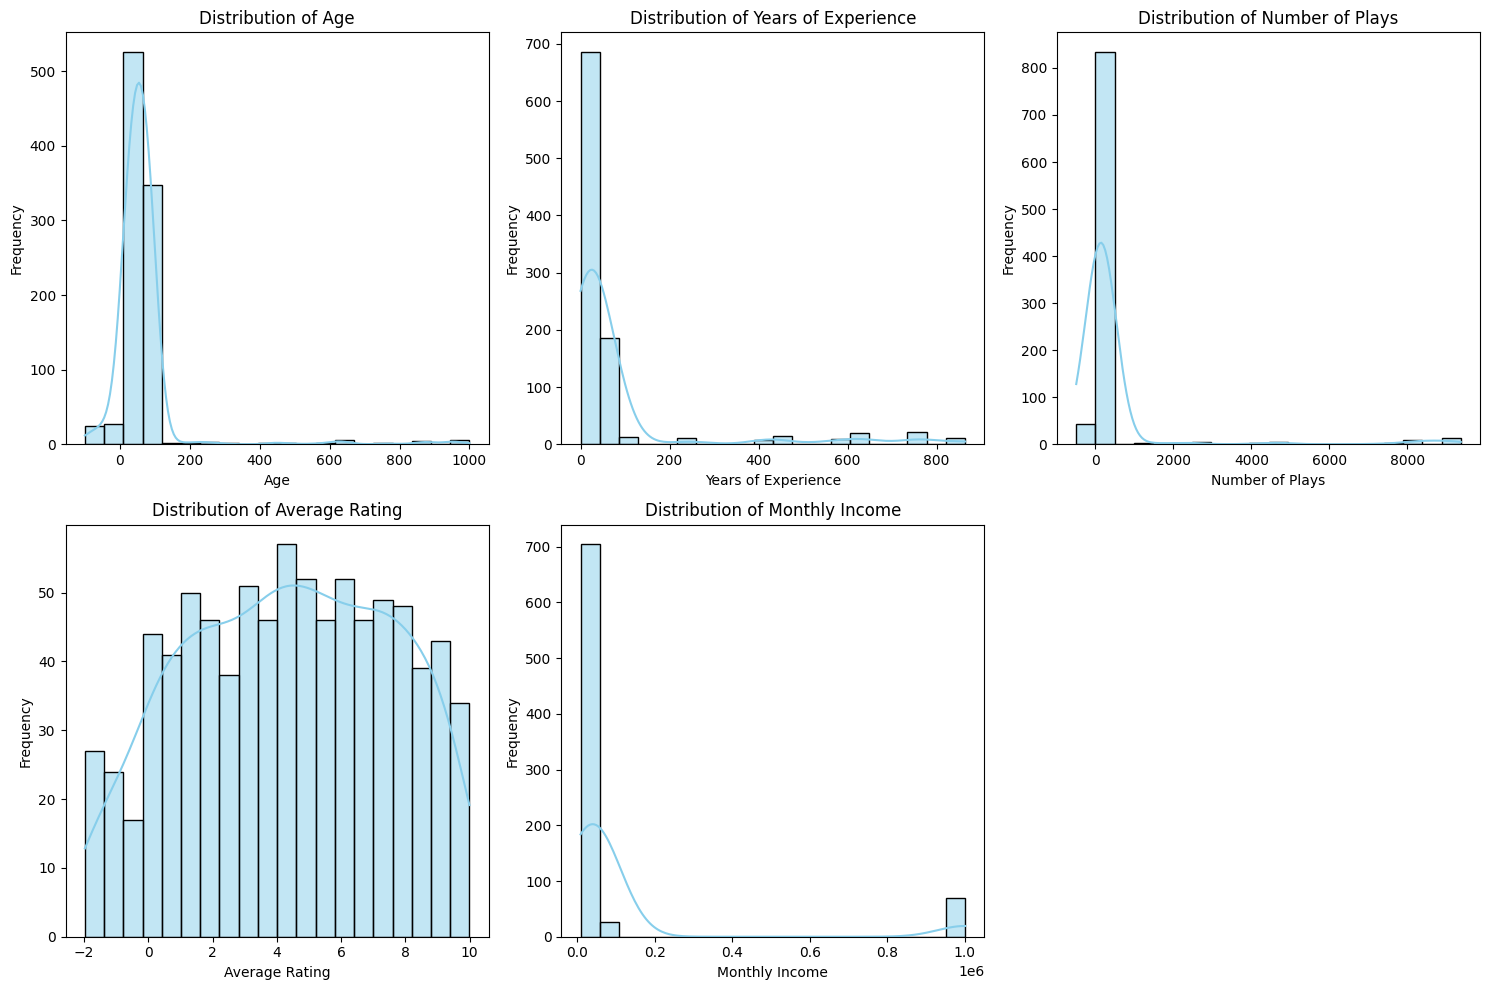

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ["Age", "Years of Experience", "Number of Plays", "Average Rating", "Monthly Income"]

# Set up the grid layout (2 rows, 3 columns in this example)
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each variable in its subplot
for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, bins=20, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots (if variables < rows * cols)
for j in range(len(variables), rows * cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

We see some outliers or invalid values in these graphs. Need to fix that.

**Boxplots**

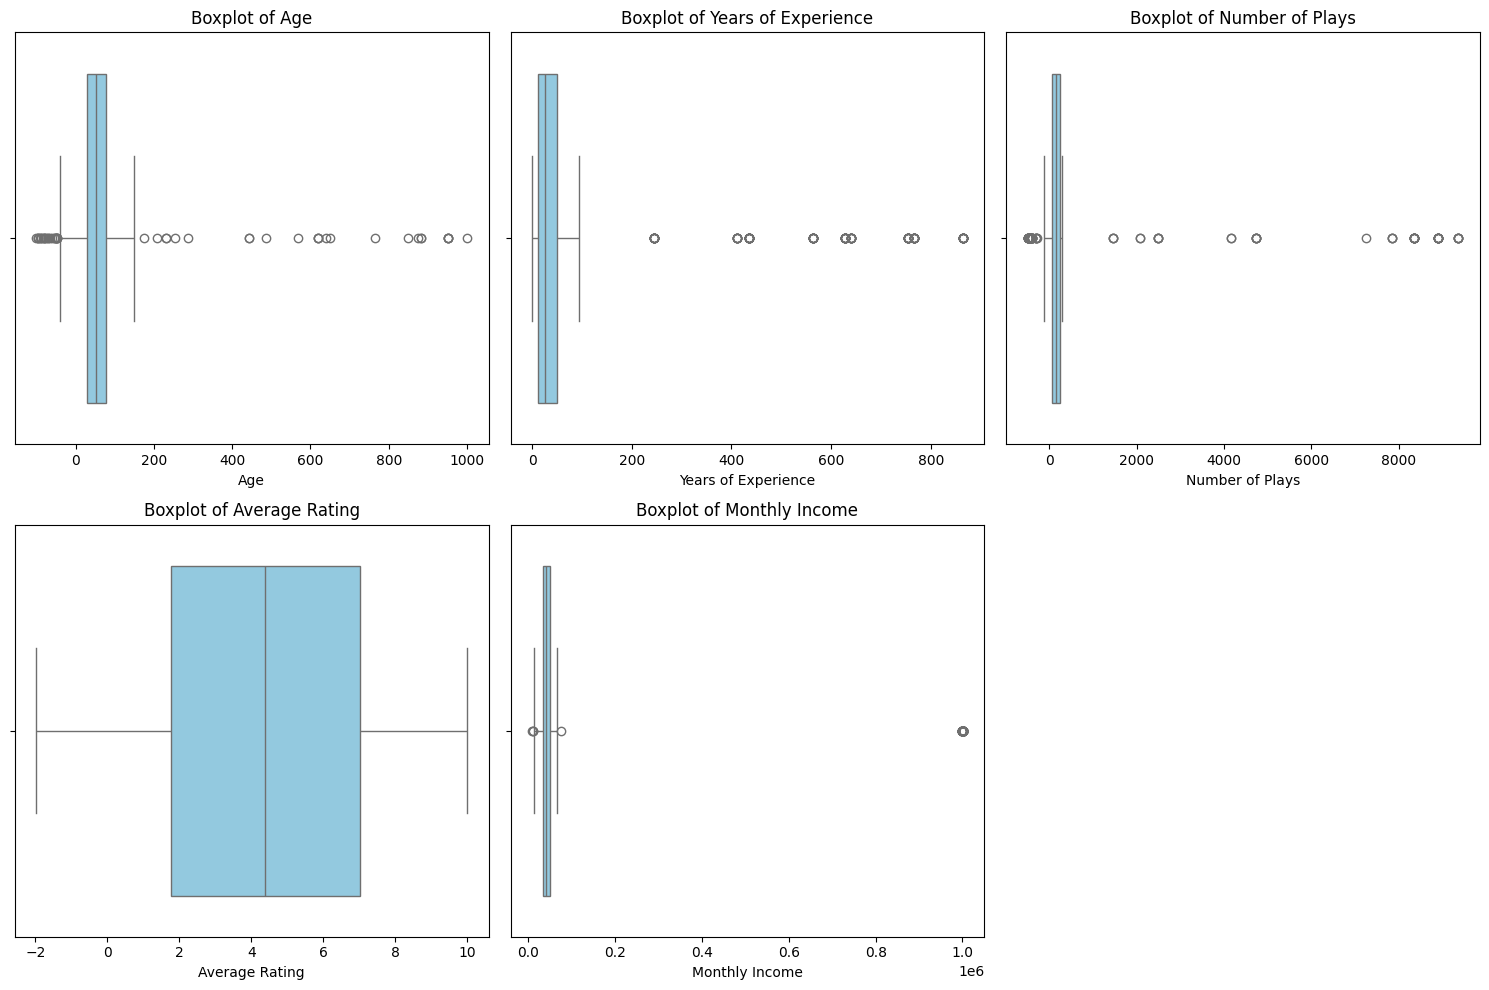

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ["Age", "Years of Experience", "Number of Plays", "Average Rating", "Monthly Income"]

# Set up the grid layout (2 rows, 3 columns in this example)
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each variable in its subplot
for i, var in enumerate(variables):
    sns.boxplot(x=df[var], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {var}")
    axes[i].set_xlabel(var)

# Hide any unused subplots (if variables < rows * cols)
for j in range(len(variables), rows * cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [105]:
df.isnull().sum() # number of missing values in variables

,0
ID,0
Age,50
Gender,80
Years of Experience,20
Number of Plays,80
Average Rating,150
Monthly Income,200
City of Residence,20


Correction of incorrect records and deletion of missing records for gender.

In [106]:
print(df['Gender'].unique())

['Male' 'f' 'Female' 'female' 'm' None 'F' 'male' 'M']


In [107]:
import numpy as np

# fix mistakes/typos in the Gender column values
def standardize_gender(gender):
    if gender in ['f', 'Female', 'female', 'F']:
        return 'Female'
    elif gender in ['m', 'Male', 'male', 'M']:
        return 'Male'
    else:
        return gender  # Keeps None as None

df['Gender'] = df['Gender'].apply(standardize_gender)
print(df['Gender'].unique())

['Male' 'Female' None]


In [108]:
df = df.dropna(subset=['Gender']) # delete rows where Gender is missing

In [109]:
df.isnull().sum()

,0
ID,0
Age,41
Gender,0
Years of Experience,19
Number of Plays,73
Average Rating,135
Monthly Income,188
City of Residence,19


Replacing missing and incorrect records in the age variable with the average.

In [110]:
df['Age'].describe()

,Age
count,879.000000
mean,65.121729
std,109.167725
min,-100.000000
25%,30.000000
50%,53.000000
75%,78.000000
max,1000.000000


In [111]:
df.loc[df['Age'] < 0, 'Age'].describe() # looks like Age was input incorrectly negative

,Age
count,39.000000
mean,-49.384615
std,28.289495
min,-100.000000
25%,-74.000000
50%,-47.000000
75%,-23.000000
max,-8.000000


In [112]:
# Replace negative Age values with their absolute value
df.loc[df['Age'] < 0, 'Age'] = df['Age'].abs()

# Verify the change
df[df['Age'] < 0]  # empty DataFrame

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence


In [113]:
df[df['Age'] > 100]

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
1,2,951.0,Female,12.0,283.0,NaN,45743.0,Ostrava
31,32,568.0,Female,53.0,127.0,NaN,39592.0,Ostrava
42,43,442.0,Male,20.0,117.0,8.66,22205.0,Brno
78,79,874.0,Male,41.0,230.0,NaN,NaN,Ostrava
93,94,765.0,Female,2.0,55.0,0.48,47020.0,Brno
110,111,951.0,Female,564.0,30.0,NaN,15316.0,Brno
124,125,882.0,Female,37.0,155.0,9.26,44946.0,Praha
199,200,649.0,Male,8.0,7844.0,NaN,32561.0,Brno
217,218,951.0,Female,30.0,114.0,2.22,43337.0,None
355,356,620.0,Male,7.0,186.0,3.15,999353.0,Brno


In [114]:
# Filter rows where Age < 100, 0 < Years of Experience < 100
condition = (df['Age'] < 100) & (df['Years of Experience'] < 100) & (df['Years of Experience'] > 0)

# Calculate the mean difference for the filtered rows
mean_diff = (df.loc[condition, 'Age'] - df.loc[condition, 'Years of Experience']).mean().round()
mean_diff

26.0

In [115]:
condition = (df['Age'] > 100) & (df['Years of Experience'] < 100) & (df['Years of Experience'] > 0)

# Replace Age values where the condition is met
df.loc[condition, 'Age'] = df.loc[condition, 'Years of Experience'] + mean_diff

# Verify the changes
df[condition]

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
1,2,38.0,Female,12.0,283.0,NaN,45743.0,Ostrava
31,32,79.0,Female,53.0,127.0,NaN,39592.0,Ostrava
42,43,46.0,Male,20.0,117.0,8.66,22205.0,Brno
78,79,67.0,Male,41.0,230.0,NaN,NaN,Ostrava
93,94,28.0,Female,2.0,55.0,0.48,47020.0,Brno
124,125,63.0,Female,37.0,155.0,9.26,44946.0,Praha
199,200,34.0,Male,8.0,7844.0,NaN,32561.0,Brno
217,218,56.0,Female,30.0,114.0,2.22,43337.0,None
355,356,33.0,Male,7.0,186.0,3.15,999353.0,Brno
425,426,59.0,Male,33.0,54.0,9.84,34713.0,Ostrava


In [116]:
df.loc[df['Age'] > 100] # both age and years of experience contain strange values - we will delete these rows

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
110,111,951.0,Female,564.0,30.0,NaN,15316.0,Brno
470,471,951.0,Male,0.0,144.0,8.68,57833.0,Ostrava


In [117]:
# Remove rows where Age > 100
df = df[df['Age'] <= 100]

# Verify the changes
df[df['Age'] > 100]  # Shows no rows

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence


In [118]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Years of Experience,18
Number of Plays,73
Average Rating,128
Monthly Income,183
City of Residence,19


Correction of incorrect records in the variable Years of Experience.

In [119]:
df['Years of Experience'].describe()

,Years of Experience
count,859.000000
mean,83.308498
std,178.645562
min,0.000000
25%,11.000000
50%,26.000000
75%,51.000000
max,864.000000


In [120]:
df[df['Years of Experience'] > 100]

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
10,11,96.0,Male,435.0,NaN,2.69,NaN,Praha
20,21,90.0,Male,767.0,-441.0,2.02,NaN,Praha
35,36,53.0,Female,245.0,134.0,9.24,998879.0,Ostrava
39,40,31.0,Male,564.0,269.0,6.76,50775.0,Ostrava
43,44,43.0,Female,864.0,35.0,4.95,36554.0,Ostrava
...,...,...,...,...,...,...,...,...
952,953,16.0,Female,640.0,202.0,6.11,46807.0,Brno
963,964,23.0,Male,245.0,207.0,4.18,48957.0,Praha
971,972,14.0,Male,412.0,267.0,3.42,40615.0,Brno
975,976,68.0,Male,435.0,207.0,7.98,38946.0,Praha


In [121]:
# Function to impute Years of Experience using something like Hot Deck method
def hot_deck_impute(row, df, age_diff=5):
    # Filter by gender, similar age, and Years of Experience < recipient Age
    potential_donors = df[
        (df['Gender'] == row['Gender']) &
        (abs(df['Age'] - row['Age']) <= age_diff) &  # Age difference
        (df['Years of Experience'] < row['Age'])    # Donor must have less Years of Experience than recipient's Age
    ]

    # Try to find a donor with a valid Years of Experience
    if not potential_donors.empty:
        donor = potential_donors.sample(n=1)  # Randomly pick one donor if multiple options are available
        return donor['Years of Experience'].iloc[0]
    else:
        # If no donor is found, return NaN (or you could return a fallback value)
        return 0

# Apply the function to rows where Years of Experience > 100
df['Years of Experience'] = df.apply(
    lambda row: hot_deck_impute(row, df) if row['Years of Experience'] > 100 else row['Years of Experience'],
    axis=1
)

# Verify the changes
df[df['Years of Experience'] > 100]  # Empty DataFrame

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence


In [122]:
# see if age <= years of experience anywhere
df[df['Age'] < df['Years of Experience']]

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
74,75,1.0,Female,35.0,170.0,NaN,1000621.0,Ostrava
363,364,2.0,Male,34.0,NaN,5.31,52054.0,Praha
514,515,17.0,Male,55.0,173.0,NaN,37623.0,Brno
533,534,29.0,Female,42.0,205.0,9.16,24495.0,Praha
542,543,23.0,Male,62.0,143.0,4.84,46268.0,Ostrava
548,549,15.0,Male,37.0,7.0,8.74,38909.0,Praha
654,655,2.0,Female,18.0,286.0,3.56,NaN,Brno
757,758,23.0,Male,83.0,2.0,5.79,52244.0,Prague
797,798,8.0,Female,23.0,242.0,5.80,24464.0,Praha
907,908,9.0,Female,36.0,248.0,9.41,35871.0,Prague


In [123]:
# use again hot deck method to replace invalid values
df['Years of Experience'] = df.apply(
    lambda row: hot_deck_impute(row, df) if row['Age'] < row['Years of Experience'] else row['Years of Experience'],
    axis=1
)

# see if age <= years of experience anywhere
df[df['Age'] < df['Years of Experience']] # Empty DataFrame

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence


In [124]:
df['Years of Experience'].isnull().sum()

18

In [125]:
# replace null values using hot deck method again
df['Years of Experience'] = df.apply(
    lambda row: hot_deck_impute(row, df) if pd.isna(row['Years of Experience']) else row['Years of Experience'],
    axis=1
)
df['Years of Experience'].isnull().sum()

0

In [126]:
df.shape

(877, 8)

Correction of incorrect and missing records in the variable Number of Plays.

In [127]:
df['Number of Plays'].describe()

,Number of Plays
count,804.000000
mean,389.380597
std,1397.134881
min,-492.000000
25%,62.000000
50%,150.500000
75%,236.250000
max,9368.000000


In [128]:
df.loc[df['Number of Plays'] < 0, 'Number of Plays'].describe()

,Number of Plays
count,41.000000
mean,-320.658537
std,161.507679
min,-492.000000
25%,-446.000000
50%,-387.000000
75%,-120.000000
max,-73.000000


In [129]:
# Replace negative values with their absolute value
df.loc[df['Number of Plays'] < 0, 'Number of Plays'] = df['Number of Plays'].abs()

df[df['Number of Plays'] < 0] # Empty DataFrame

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence


In [130]:
df[df['Number of Plays'] > 500]

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
70,71,78.0,Female,63.0,4731.0,5.51,43786.0,Praha
89,90,37.0,Female,8.0,4731.0,6.83,NaN,Ostrava
112,113,15.0,Female,3.0,9368.0,4.72,NaN,Praha
122,123,38.0,Male,10.0,7258.0,1.62,54450.0,Ostrava
149,150,76.0,Female,66.0,9368.0,1.47,44923.0,Ostrava
169,170,34.0,Female,15.0,2089.0,NaN,20599.0,Ostrava
199,200,34.0,Male,8.0,7844.0,NaN,32561.0,Brno
213,214,59.0,Male,8.0,8340.0,5.05,38066.0,Praha
238,239,24.0,Female,1.0,8905.0,5.48,37938.0,Praha
249,250,75.0,Male,22.0,4731.0,8.22,37661.0,Praha


In [131]:
# Compute a ratio of Number of Plays to Years of Experience
df['Plays per Year'] = df['Number of Plays'] / df['Years of Experience']

# Determine a reasonable threshold for this ratio (median)
plays_med = df['Plays per Year'].median()
plays_med

# Delete the 'Plays per Year' column from the DataFrame
df.drop(columns=['Plays per Year'], inplace=True)

In [132]:
# Adjust Number of Plays (values > 500 or missing values) based on this ratio
def adjust_plays(row):
    if row['Number of Plays'] > 500 or pd.isna(row['Number of Plays']):
        return round(plays_med * row['Years of Experience'])
    else:
        return row['Number of Plays']  # Leave it as is if it's within the expected range

df['Number of Plays'] = df.apply(adjust_plays, axis=1)

df[df['Number of Plays'] > 500] # these are a result of the way we replaced the large/missing values, they're not that much bigger then 500, it's OK

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
194,195,94.0,Male,80.0,575.0,4.79,NaN,Brno
379,380,97.0,Male,91.0,655.0,7.48,1000722.0,Brno
636,637,96.0,Female,86.0,619.0,NaN,36314.0,Ostrava
891,892,78.0,Male,74.0,532.0,2.92,NaN,Brno
906,907,79.0,Female,72.0,518.0,3.89,NaN,Ostrava


In [133]:
df['Number of Plays'].describe()

,Number of Plays
count,877.000000
mean,165.404789
std,111.327888
min,0.000000
25%,73.000000
50%,158.000000
75%,244.000000
max,655.000000


In [134]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Years of Experience,0
Number of Plays,0
Average Rating,128
Monthly Income,183
City of Residence,19


Adjustment of the Average Rating.

In [135]:
df['Average Rating'].describe()

,Average Rating
count,749.000000
mean,4.303151
std,3.201023
min,-1.970000
25%,1.620000
50%,4.320000
75%,6.990000
max,9.990000


In [136]:
# Calculate the mean of 'Average Rating' values that are greater than 0
mean_rating = df[df['Average Rating'] > 0]['Average Rating'].mean()

# Define a function to impute values based on the condition
def impute_rating(row):
    # If 'Average Rating' is less than 0 or is null, replace it with the mean
    if pd.isna(row['Average Rating']) or row['Average Rating'] < 0:
        return mean_rating
    return row['Average Rating']

# Apply the function to impute the 'Average Rating'
df['Average Rating'] = df.apply(impute_rating, axis=1)

df['Average Rating'].describe()

,Average Rating
count,877.000000
mean,4.872422
std,2.472331
min,0.010000
25%,3.170000
50%,4.872422
75%,6.510000
max,9.990000


In [137]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Years of Experience,0
Number of Plays,0
Average Rating,0
Monthly Income,183
City of Residence,19


Checking Monthly Income

In [138]:
df['Monthly Income'].describe()

,Monthly Income
count,6.940000e+02
mean,1.215855e+05
std,2.681364e+05
min,8.709000e+03
25%,3.411600e+04
50%,4.076850e+04
75%,4.897800e+04
max,1.000726e+06


In [139]:
df[df['Monthly Income'] > 500000]

,ID,Age,Gender,Years of Experience,Number of Plays,Average Rating,Monthly Income,City of Residence
14,15,19.0,Female,19.0,387.0,4.872422,999353.0,Brno
24,25,69.0,Female,8.0,233.0,4.872422,1000284.0,Praha
25,26,74.0,Female,19.0,252.0,4.872422,1000284.0,Praha
35,36,53.0,Female,30.0,134.0,9.240000,998879.0,Ostrava
48,49,34.0,Male,2.0,150.0,4.872422,1000284.0,Brno
54,55,60.0,Female,55.0,27.0,4.720000,998879.0,Prague
74,75,1.0,Female,0.0,170.0,4.872422,1000621.0,Ostrava
84,85,14.0,Female,9.0,141.0,4.872422,1000368.0,Praha
108,109,47.0,Male,26.0,246.0,4.950000,998879.0,None
150,151,97.0,Male,28.0,238.0,0.510000,1000726.0,Brno


In [140]:
# Replace NaN values in 'Monthly Income' with the median
median_income = df.loc[df['Monthly Income'] <= 500000, 'Monthly Income'].median()
median_income
df['Monthly Income'].fillna(median_income, inplace=True)

# Delete rows where 'Monthly Income' is greater than 500000
df = df[df['Monthly Income'] <= 500000]

<ipython-input-140-4188ebfd27a8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly Income'].fillna(median_income, inplace=True)


In [141]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Years of Experience,0
Number of Plays,0
Average Rating,0
Monthly Income,0
City of Residence,16


Finally, checking the last variable, City of Residence.

In [142]:
df['City of Residence'].describe()

,City of Residence
count,802
unique,9
top,Ostrava
freq,269


In [143]:
print(df['City of Residence'].unique())

['Ostrava' 'Praha' 'Brno' 'Prague' 'BRNO' 'ostrava' 'praha' None 'ostava'
 'brno']


In [144]:
# fix mistakes/typos in the City of Residence column
def standardize_city(city):
    if city in ['Ostrava', 'ostrava', 'ostava']:
        return 'Ostrava'
    elif city in ['Brno', 'BRNO', 'brno']:
        return 'Brno'
    elif city in ['Praha', 'praha', 'Prague']:
        return 'Praha'
    else:
        return city  # Keeps None as None

df['City of Residence'] = df['City of Residence'].apply(standardize_city)
print(df['City of Residence'].unique())

['Ostrava' 'Praha' 'Brno' None]


In [145]:
# delete rows where City of Residence is None
df = df.dropna(subset=['City of Residence'])

In [146]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Years of Experience,0
Number of Plays,0
Average Rating,0
Monthly Income,0
City of Residence,0


In [147]:
df.shape

(802, 8)

In [148]:
df.describe()

,ID,Age,Years of Experience,Number of Plays,Average Rating,Monthly Income
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,494.109726,54.137157,27.228180,165.960100,4.836703,39855.962594
std,286.901786,25.818315,22.425219,111.257856,2.486642,8893.875991
min,1.000000,2.000000,0.000000,0.000000,0.010000,8709.000000
25%,244.500000,33.000000,9.000000,73.250000,3.075000,35126.750000
50%,493.500000,53.000000,22.000000,158.000000,4.872422,39394.000000
75%,739.500000,76.000000,40.000000,244.000000,6.467500,44332.250000
max,999.000000,100.000000,94.000000,619.000000,9.990000,74211.000000


# Checking Cleaned Data

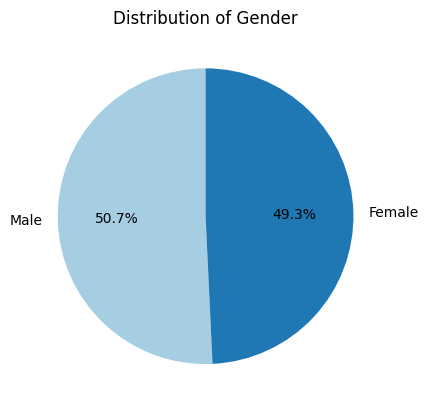

In [149]:
# Group data by 'Gender' and count occurrences
grouped_data = df['Gender'].value_counts()

# Create Pie Chart
grouped_data.plot(kind='pie', autopct='%1.1f%%', colors= plt.cm.Paired.colors, labels=grouped_data.index, startangle=90)

# Customizing the chart
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the y-axis label for cleaner output
plt.show()

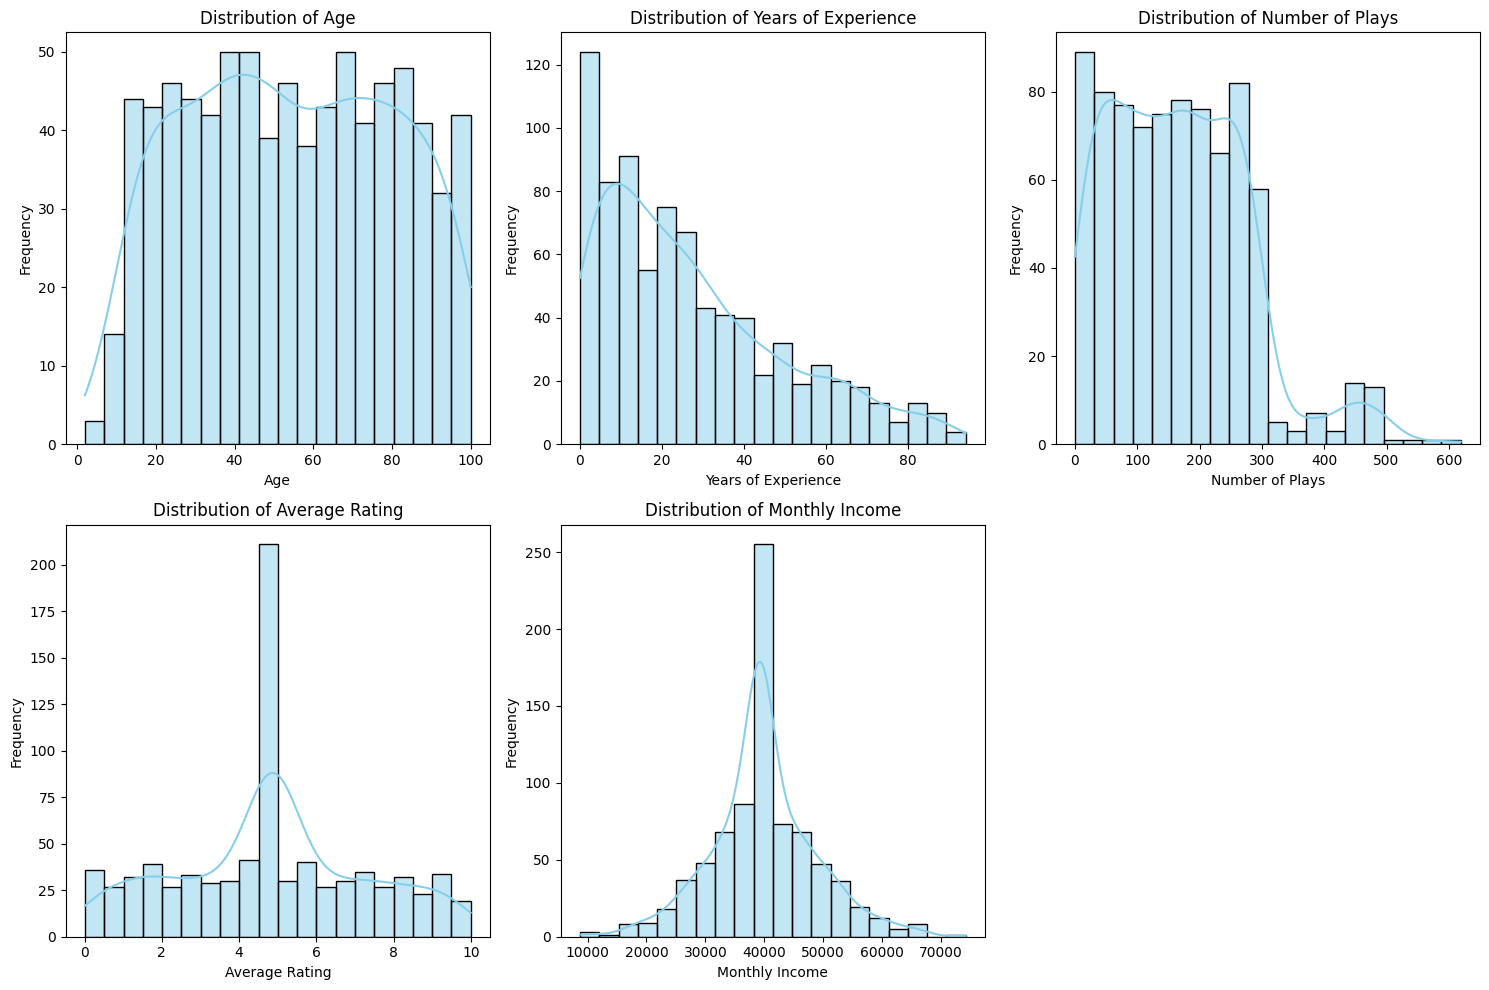

In [150]:
# List of variables to plot
variables = ["Age", "Years of Experience", "Number of Plays", "Average Rating", "Monthly Income"]

# Set up the grid layout (2 rows, 3 columns in this example)
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each variable in its subplot
for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, bins=20, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots (if variables < rows * cols)
for j in range(len(variables), rows * cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

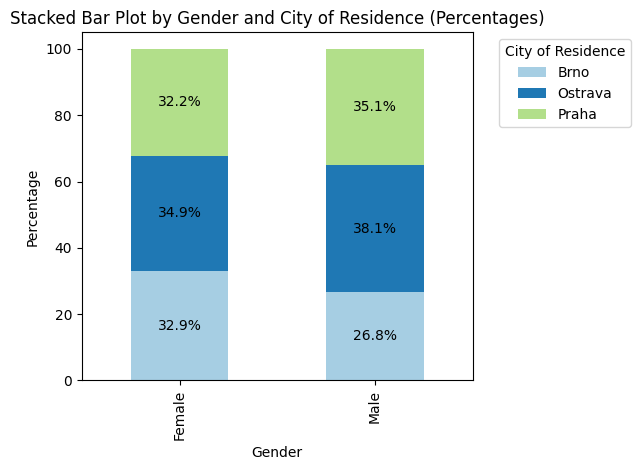

In [151]:
# Group data by 'Gender' and 'City of Residence', and count occurrences
grouped_data = df.groupby(['Gender', 'City of Residence']).size().unstack(fill_value=0)

# Convert counts to percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create a stacked bar plot with percentages
ax = grouped_data_percentage.plot(kind='bar', stacked=True, color=plt.cm.Paired.colors[:len(grouped_data.columns)])

# Adding labels with percentages
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero segments
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Customizing the chart
plt.title('Stacked Bar Plot by Gender and City of Residence (Percentages)')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Move legend to the right side of the plot
plt.legend(title='City of Residence', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

# Relationships between variables

**Correlation structure**

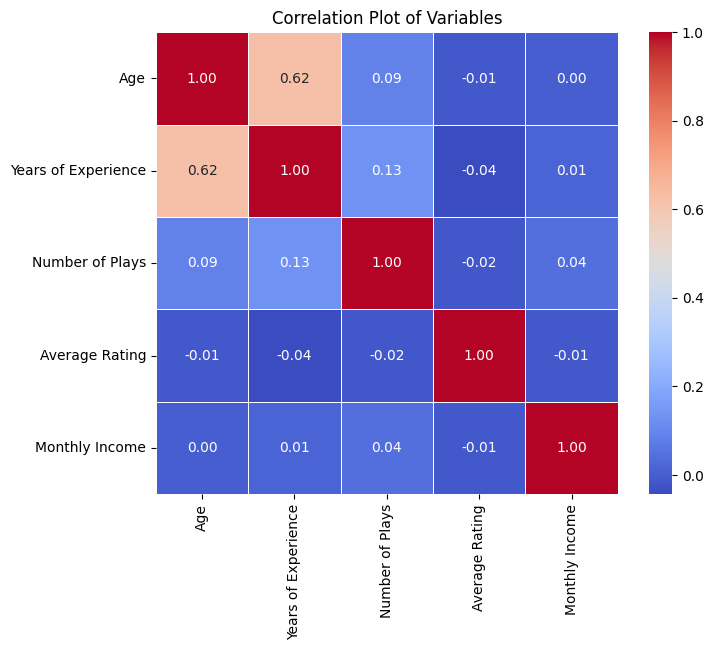

In [155]:
# Select the variables for the correlation plot
variables = ["Age", "Years of Experience", "Number of Plays", "Average Rating", "Monthly Income"]

# Calculate the correlation matrix
correlation_matrix = df[variables].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Customizing the chart
plt.title('Correlation Plot of Variables')
plt.show()

**PCA**

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

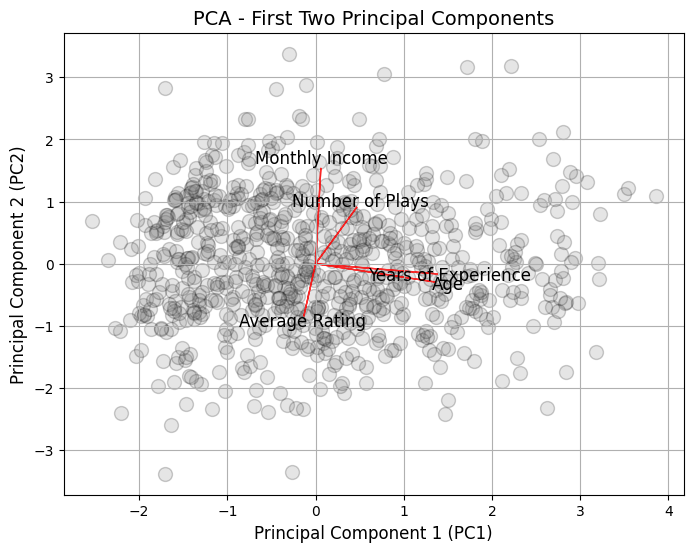

Loadings (Weights for the components):
                           PC1       PC2
Age                  0.680641 -0.147483
Years of Experience  0.690527 -0.081910
Number of Plays      0.233713  0.454452
Average Rating      -0.066231 -0.419898
Monthly Income       0.029875  0.767267


In [157]:
# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variables])

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pc_values = pca.fit_transform(scaled_data)

# Create a DataFrame with the first two principal components
pc_df = pd.DataFrame(pc_values, columns=['PC1', 'PC2'])

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], color='gray', s=100, edgecolor='k', alpha=0.2)

# Adding labels and title
plt.title('PCA - First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)

# Show the plot
plt.grid(True)

# Show the loadings (contributions of each feature to each principal component)
loadings = pca.components_  # Shape (n_components, n_features)

# Create a biplot to show the loadings for PC1 and PC2
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[0, i]*2, loadings[1, i]*2, color='red', alpha=0.8)
    plt.text(loadings[0, i]*2.2, loadings[1, i]*2.2, var, color='black', ha='center', va='center', fontsize=12)

plt.show()

# Print the loadings to check the weight of each feature for the first two components
loading_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=variables)
print("Loadings (Weights for the components):\n", loading_df)

In [158]:
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio (Percentage of variability explained by each component):")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var * 100:.2f}%")


Explained Variance Ratio (Percentage of variability explained by each component):
PC1: 33.31%
PC2: 20.61%


# Can Monthly Income be somehow predicted by other variables?

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

<Figure size 1000x600 with 0 Axes>

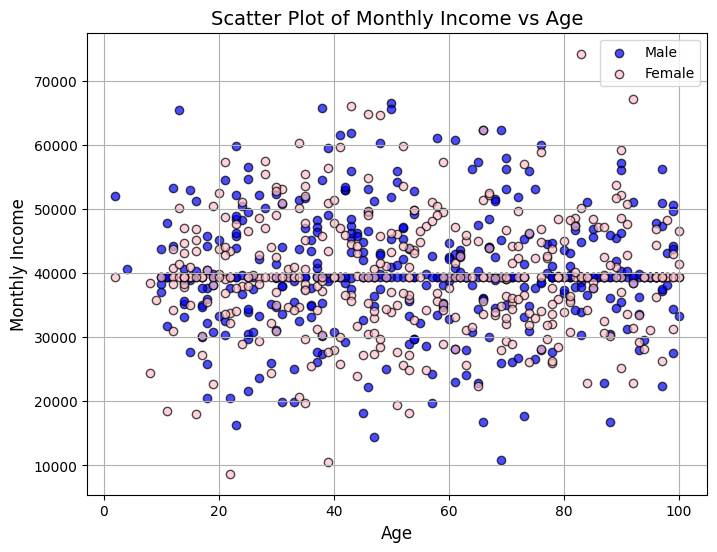

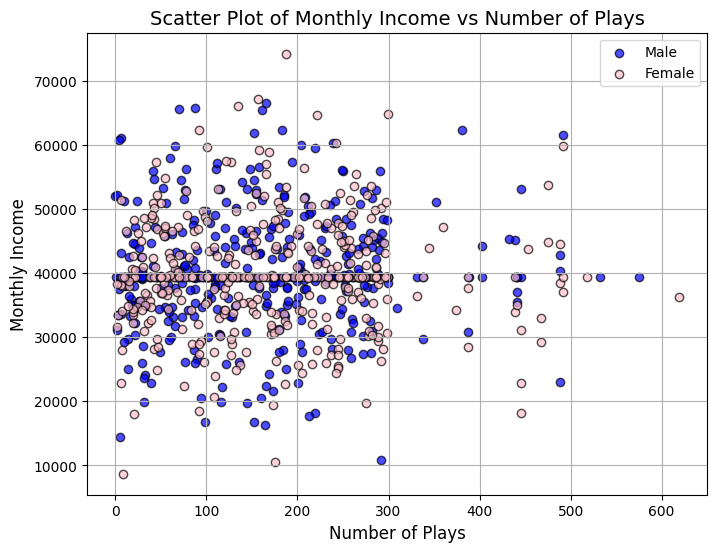

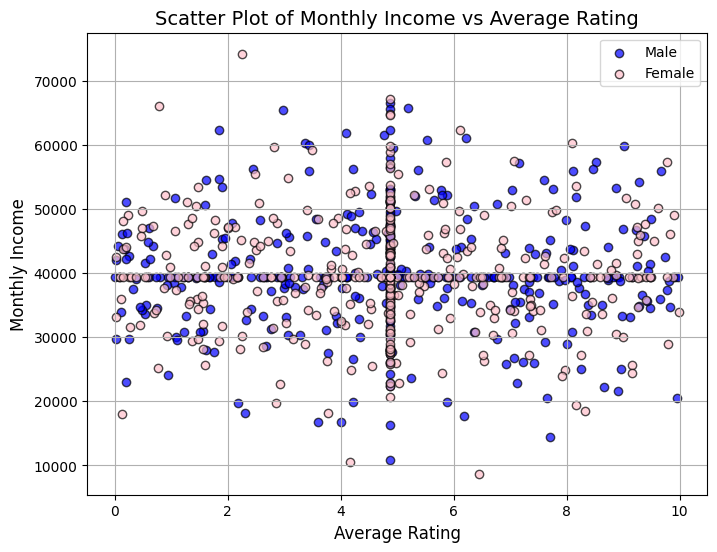

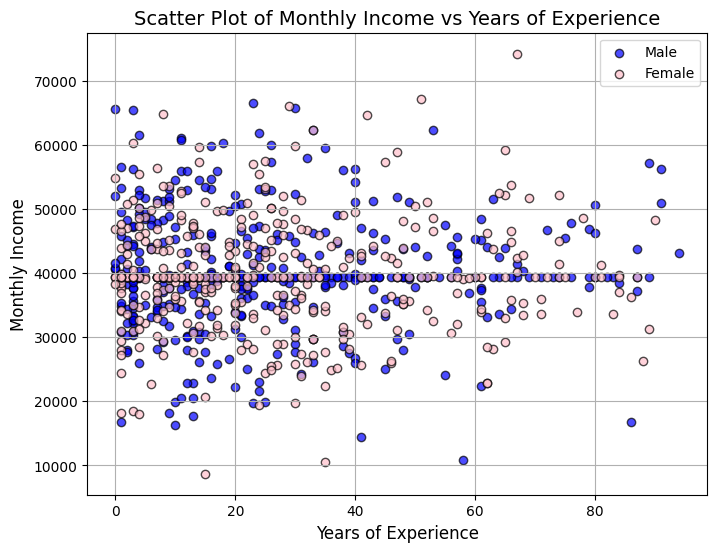

In [168]:
# List of continuous variables to plot against 'Monthly Income'
continuous_variables = ['Age', 'Number of Plays', 'Average Rating', 'Years of Experience']

# Set up the figure size
plt.figure(figsize=(10, 6))

# Loop through the continuous variables and create scatter plots
for var in continuous_variables:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot

    # Scatter plot of 'Monthly Income' vs continuous variable with Gender differentiation
    plt.scatter(df[df['Gender'] == 'Male'][var], df[df['Gender'] == 'Male']['Monthly Income'],
                color='blue', alpha=0.7, edgecolors='k', label='Male')
    plt.scatter(df[df['Gender'] == 'Female'][var], df[df['Gender'] == 'Female']['Monthly Income'],
                color='pink', alpha=0.7, edgecolors='k', label='Female')

    # Adding labels and title
    plt.title(f'Scatter Plot of Monthly Income vs {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Monthly Income', fontsize=12)

    # Add legend
    plt.legend(loc='best')

    # Show the plot
    plt.grid(True)
    plt.show()

<Figure size 1000x600 with 0 Axes>

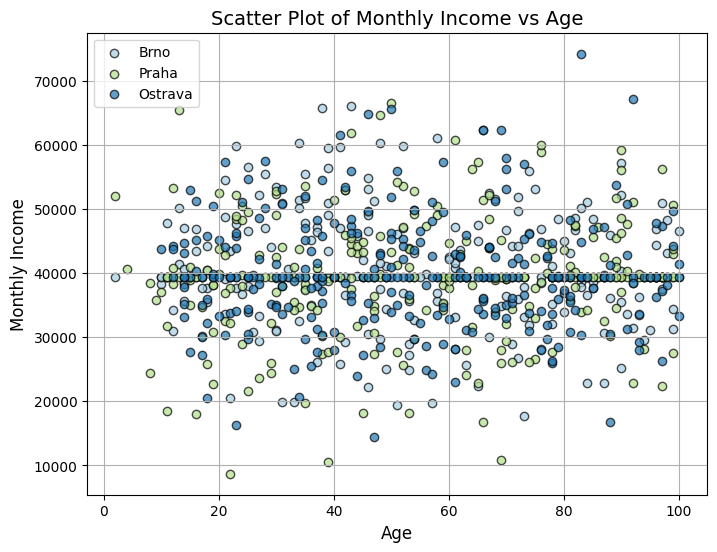

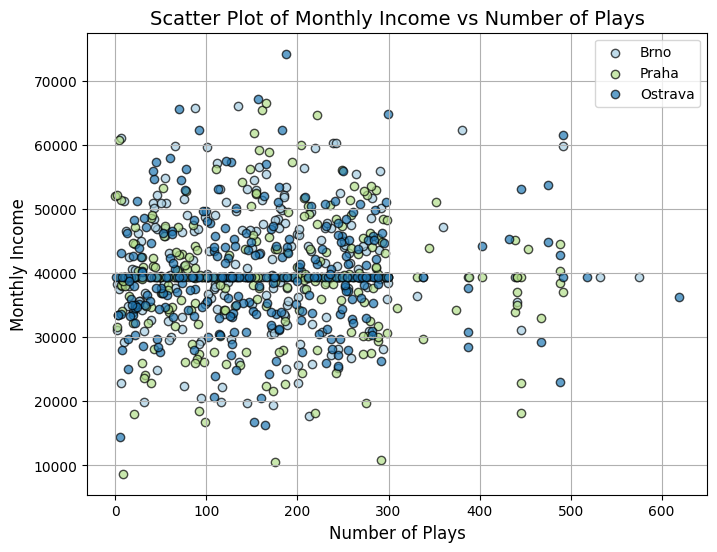

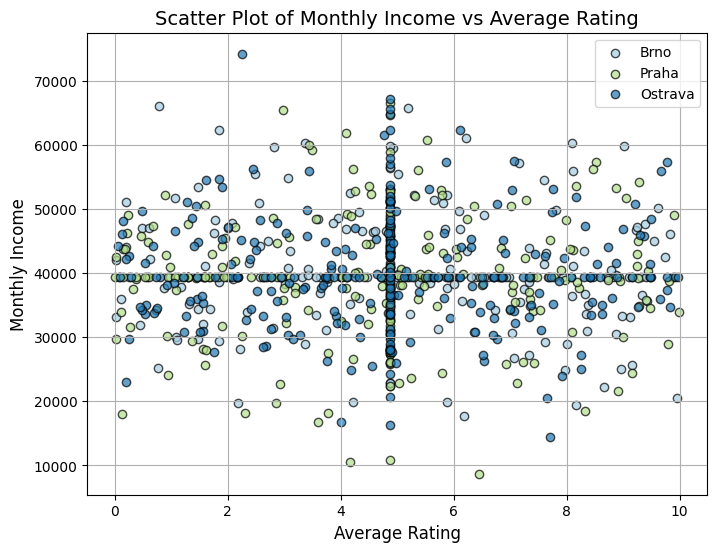

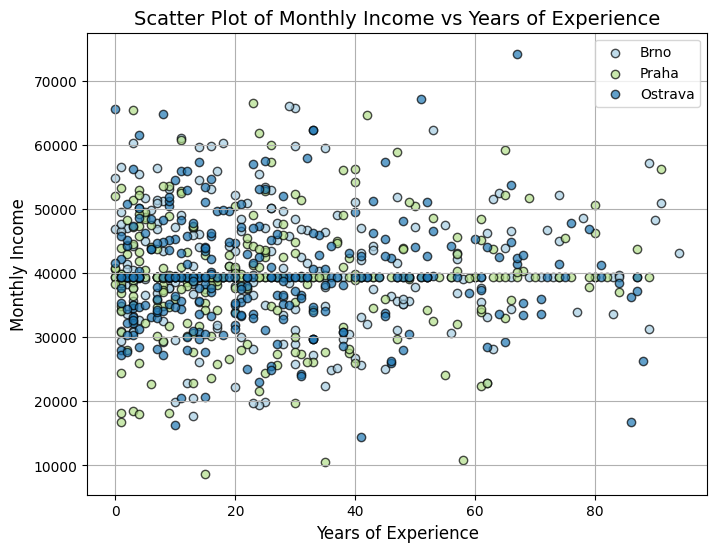

In [171]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a dictionary for City of Residence to color mapping using the Paired colormap
city_colors = {
    'Brno': plt.cm.Paired(0),  # First color in Paired colormap
    'Praha': plt.cm.Paired(2),  # Second color in Paired colormap
    'Ostrava': plt.cm.Paired(1),  # Third color in Paired colormap
}

# Loop through the continuous variables and create scatter plots
for var in continuous_variables:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot

    # Scatter plot for each city with colors from the Paired colormap
    for city in city_colors.keys():
        city_data = df[df['City of Residence'] == city]
        plt.scatter(city_data[var], city_data['Monthly Income'],
                    color=city_colors[city], alpha=0.7, edgecolors='k', label=city)

    # Adding labels and title
    plt.title(f'Scatter Plot of Monthly Income vs {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Monthly Income', fontsize=12)

    # Add legend
    plt.legend(loc='best')

    # Show the plot
    plt.grid(True)
    plt.show()

No visible relationship, but we can have a look also at regresion to see no predictibility. It makes sense, data were generated randomly, therefore no pattern.

Coefficients: [ 7.55731876e-01  3.61222471e+00 -1.13213453e+02  6.74768973e+02
 -9.19979371e+02 -1.68632573e+03]
Intercept: 40461.34540696135
Mean Squared Error: 88270633.90583159
R^2 Score: -0.002256122902133173


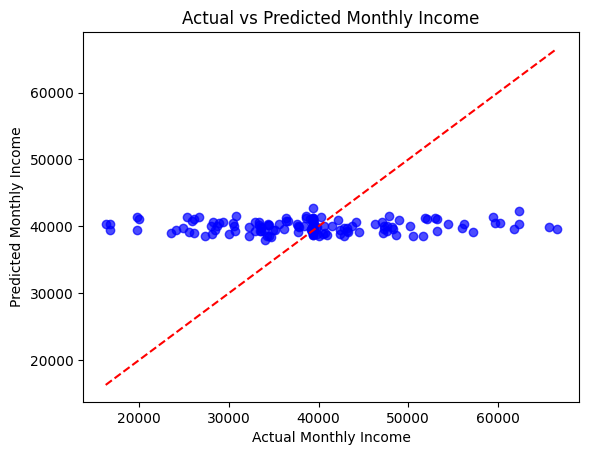

In [172]:
# Convert categorical variables to numeric using One-Hot Encoding for 'Gender' and 'City of Residence'
df_encoded = pd.get_dummies(df, columns=['Gender', 'City of Residence'], drop_first=True)

# Define independent variables and dependent variable
X = df_encoded[['Age', 'Number of Plays', 'Average Rating', 'Gender_Male', 'City of Residence_Ostrava', 'City of Residence_Praha']]
y = df_encoded['Monthly Income']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting Actual vs Predicted Monthly Income
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('Actual vs Predicted Monthly Income')
plt.show()

We showed, that data are random and no there is no correlation between variables and income. Also visible in correlation matrix.